In [1]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import v2
import pandas as pd
import numpy as np
import os
from natsort import natsorted
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from tqdm import tqdm
import math

In [2]:
path = './datasets/tennis/game3/Clip3/0042.jpg'

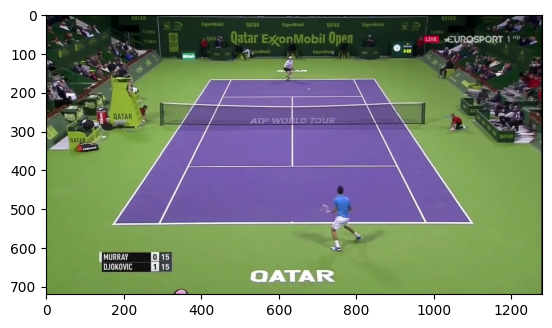

In [8]:
img = cv2.imread(path)[:, :, [2, 1, 0]]
plt.imshow(img)

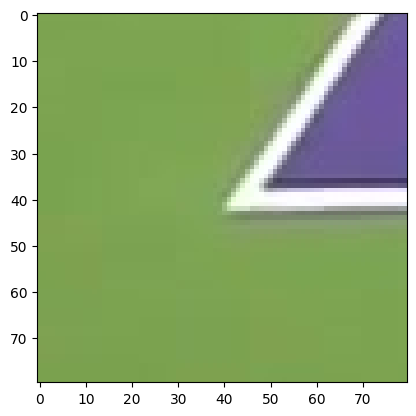

In [9]:
cropped = img[500:580, 130:210, :]
plt.imshow(cropped)

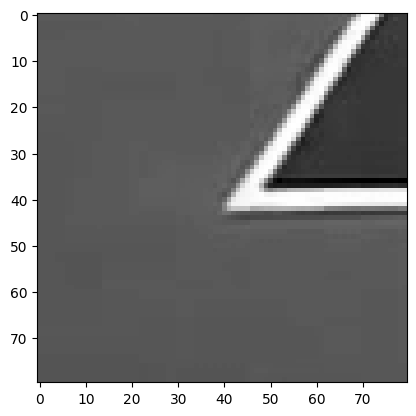

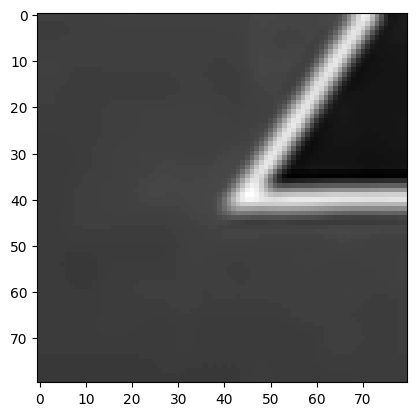

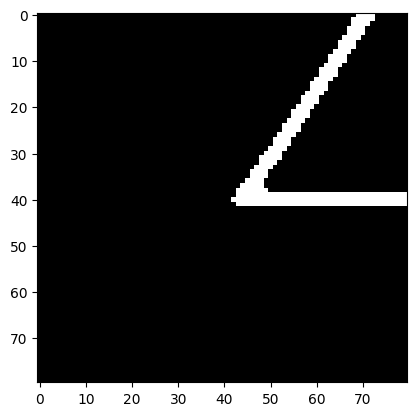

In [12]:
cropped_gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
plt.imshow(cropped_gray, cmap='gray')
plt.show()

blur_gray = cv2.GaussianBlur(cropped_gray, (5, 5), 5)
plt.imshow(blur_gray, cmap='gray')
plt.show()

threshed = cv2.threshold(blur_gray, 200, 255, cv2.THRESH_BINARY)[1]
plt.imshow(threshed, cmap='gray')

In [190]:
lines = cv2.HoughLinesP(threshed, 1, np.pi / 180, threshold=30, minLineLength=20, maxLineGap=40)

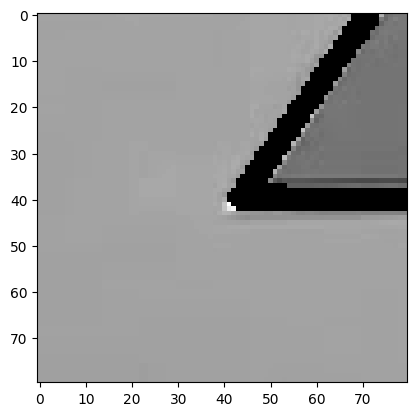

In [191]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(cropped_gray, (x1, y1), (x2, y2), (0, 255, 0), 2)

# x1, y1, x2, y2 = lines[0][0]
# cv2.line(cropped_gray, (x1, y1), (x2, y2), (0, 255, 0), 2)

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(cropped_gray, cmap='gray')



In [192]:
print(len(lines))

for line in lines:
    print(line[0])

5
[43 40 72  1]
[42 40 71  0]
[55 41 79 41]
[43 41 79 39]
[45 38 79 40]


In [193]:
lines = np.reshape(lines, (lines.shape[0], lines.shape[2]))

In [ ]:
# NOTE: currently (len(lines) == 6) is done with threshold of 20 (for better "angle sorting testing"). threshold before was 30

print(lines.shape)


# aaaaaaa = sorted(lines, key=lambda x: x[-1])
# print(aaaaaaa)

sorted_lines = sorted(lines, key=lambda x: math.atan((x[3] - x[1])/(x[2] - x[0])))
arr = np.array(sorted_lines)
print(arr)

(5, 4)
[[42 40 71  0]
 [43 40 72  1]
 [43 41 79 39]
 [55 41 79 41]
 [45 38 79 40]]


: 